In [2]:
# A lot of the code is used from the tutorial from Google Colab
# https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_image_retraining.ipynb
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import argparse
import os
from skimage import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/My Drive/")


Mounted at /content/drive


In [8]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [9]:
model_name = "efficientnetv2-s-21k" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

#IMAGE_SIZE = (pixels, pixels)
IMAGE_SIZE = (250,250)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 128 #@param {type:"integer"}

Selected model: efficientnetv2-s-21k : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2
Input size (250, 250)


In [10]:
data_dir = 'CAPTCHAs_data/simulated_clocks'
# List of moderators
file = open('CAPTCHAs_data/index_true.txt', 'r')
Lines = file.readlines()
images_names = []
all_labels = []
for line in Lines:
    #images_names.append(str(line.strip()).split(',')[0][1:-1])
    all_labels.append(str(line.strip()).split('\t'))
    images_names.append(str(line.strip()).split('\t')[0])

images_names.sort(key = str)
all_labels.sort(key=str)
#sorted_labels =[]
#for i in images_names:
#  if labels []
#  sorted_labels.append()
#print(labels)
hour_labels = []
for l in all_labels:
  if l[1] == '12':
    l[1] = '0'
  hour_labels.append(int(l[1]))
  #print(l[1])
print(set(hour_labels))
#hour_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [11]:
dir_hour = 'CAPTCHAs_data/simulated_clocks/hour/'

#data_dir = tf.keras.utils.get_file('simulated_clocks','CAPTCHAs_data/')

In [12]:

def build_dataset(subset):
  return tf.keras.preprocessing.image_dataset_from_directory(
      dir_hour,
      validation_split=.20,
      subset=subset,
      labels = 'inferred',
      label_mode='categorical',
      # Seed needs to provided when using validation_split and shuffle = True.
      # A fixed seed is used so that the validation set is stable across runs.
      seed=123,
      image_size=IMAGE_SIZE,
      batch_size= 1)

train_ds = build_dataset("training")
class_names = tuple(train_ds.class_names)
train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(BATCH_SIZE)
train_ds = train_ds.repeat()

normalization_layer = tf.keras.layers.Rescaling(1. / 255)
preprocessing_model = tf.keras.Sequential([normalization_layer])
do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  preprocessing_model.add(
      tf.keras.layers.RandomRotation(40))
  preprocessing_model.add(
      tf.keras.layers.RandomTranslation(0, 0.2))
  preprocessing_model.add(
      tf.keras.layers.RandomTranslation(0.2, 0))
  # Like the old tf.keras.preprocessing.image.ImageDataGenerator(),
  # image sizes are fixed when reading, and then a random zoom is applied.
  # If all training inputs are larger than image_size, one could also use
  # RandomCrop with a batch size of 1 and rebatch later.
  preprocessing_model.add(
      tf.keras.layers.RandomZoom(0.2, 0.2))
  preprocessing_model.add(
      tf.keras.layers.RandomFlip(mode="horizontal"))
train_ds = train_ds.map(lambda images, labels:
                        (preprocessing_model(images), labels))

val_ds = build_dataset("validation")
valid_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(BATCH_SIZE)
val_ds = val_ds.map(lambda images, labels:
                    (normalization_layer(images), labels))



Found 51779 files belonging to 12 classes.
Using 41424 files for training.
Found 51779 files belonging to 12 classes.
Using 10355 files for validation.


In [13]:
do_fine_tuning = False #@param {type:"boolean"}

In [14]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(len(class_names),
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              20331360  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 20,346,732
Trainable params: 15,372
Non-trainable params: 20,331,360
_________________________________________________________________


In [15]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  #loss = tf.keras.losses.SparseCategoricalCrossentropy(
  #  from_logits=False,
  #  name='sparse_categorical_crossentropy'),
  metrics=['accuracy'])

In [16]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE
hist = model.fit(
    train_ds,
    epochs=20, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps).history

Epoch 1/20
323/323 [==============================] - 7702s 24s/step - loss: 2.6927 - accuracy: 0.1510 - val_loss: 2.4318 - val_accuracy: 0.1989
Epoch 2/20
323/323 [==============================] - 121s 374ms/step - loss: 2.4885 - accuracy: 0.1827 - val_loss: 2.3954 - val_accuracy: 0.2162
Epoch 3/20
323/323 [==============================] - 121s 374ms/step - loss: 2.4418 - accuracy: 0.1947 - val_loss: 2.3367 - val_accuracy: 0.2065
Epoch 4/20
323/323 [==============================] - 120s 373ms/step - loss: 2.4257 - accuracy: 0.1995 - val_loss: 2.3754 - val_accuracy: 0.2292
Epoch 5/20
323/323 [==============================] - 121s 373ms/step - loss: 2.4056 - accuracy: 0.2089 - val_loss: 2.4478 - val_accuracy: 0.2103
Epoch 6/20
323/323 [==============================] - 120s 372ms/step - loss: 2.4023 - accuracy: 0.2099 - val_loss: 2.3639 - val_accuracy: 0.2140
Epoch 7/20
323/323 [==============================] - 120s 373ms/step - loss: 2.4019 - accuracy: 0.2129 - val_loss: 2.2073 - 

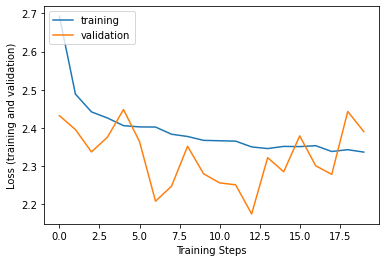

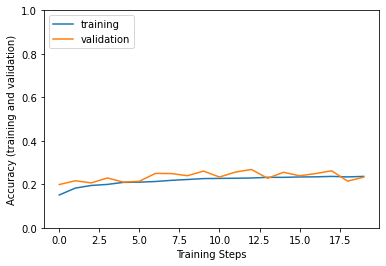

In [18]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
#plt.ylim([0,2])
plt.plot(hist["loss"], label='training')
plt.plot(hist["val_loss"], label='validation')
plt.legend(loc="upper left")

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"], label='training')
plt.plot(hist["val_accuracy"], label='validation')
plt.legend(loc="upper left")

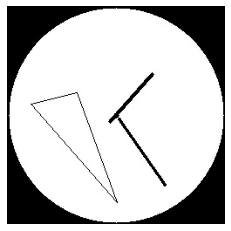

True label: 1
Predicted label: 1


In [19]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

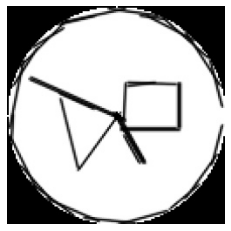

6.jpeg
True label: 5
Predicted label: 2


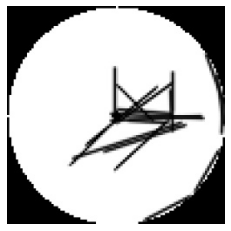

20.jpeg
True label: 2
Predicted label: 2


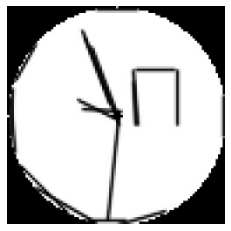

16.jpeg
True label: 9
Predicted label: 2


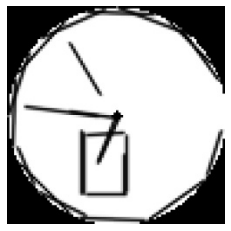

1.jpeg
True label: 7
Predicted label: 3


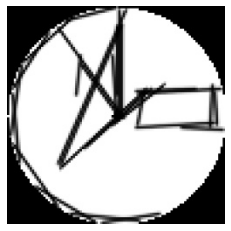

11.jpeg
True label: 2
Predicted label: 4


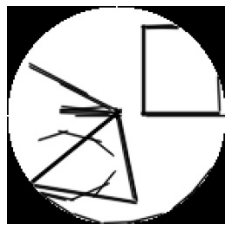

test.jpeg
True label: 8
Predicted label: 4


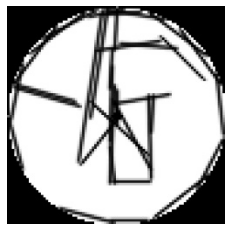

27.jpeg
True label: 4
Predicted label: 8


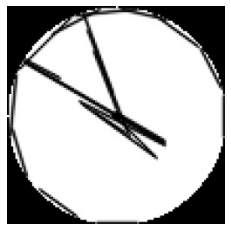

31.jpeg
True label: 3
Predicted label: 2


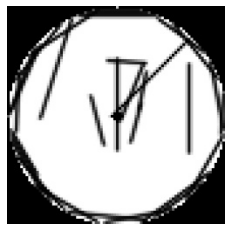

30.jpeg
True label: 1
Predicted label: 4


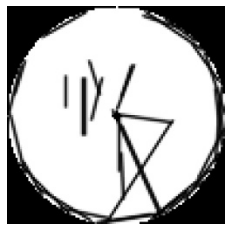

26.jpeg
True label: 0
Predicted label: 4


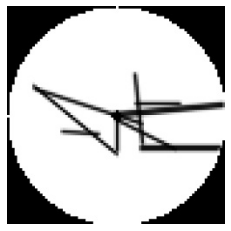

10.jpeg
True label: 4
Predicted label: 5


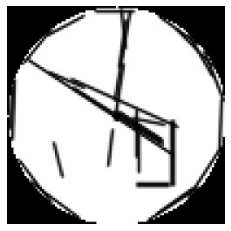

3.jpeg
True label: 4
Predicted label: 2


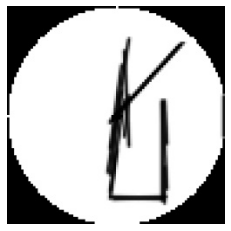

29.jpeg
True label: 6
Predicted label: 2


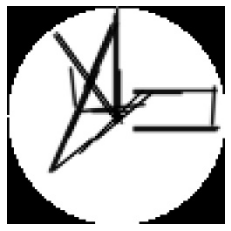

13.jpeg
True label: 2
Predicted label: 2


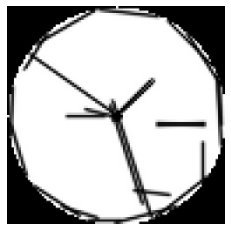

25.jpeg
True label: 1
Predicted label: 2


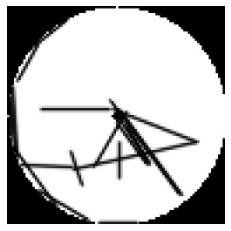

24.jpeg
True label: 5
Predicted label: 2


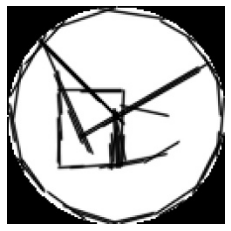

28.jpeg
True label: 6
Predicted label: 2


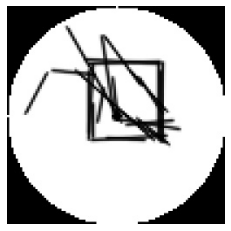

19.jpeg
True label: 4
Predicted label: 9


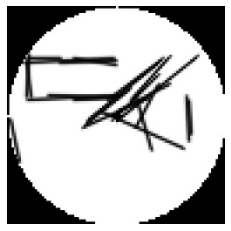

23.jpeg
True label: 4
Predicted label: 4


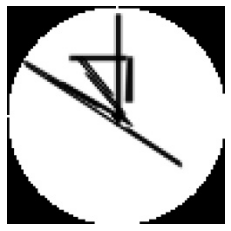

9.jpeg
True label: 11
Predicted label: 3


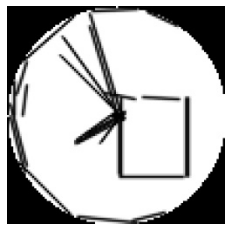

12.jpeg
True label: 8
Predicted label: 6


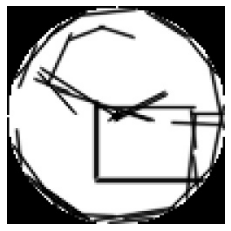

2.jpeg
True label: 2
Predicted label: 2


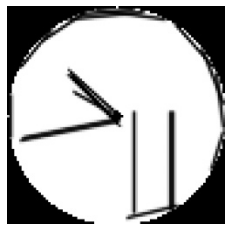

5.jpeg
True label: 10
Predicted label: 2


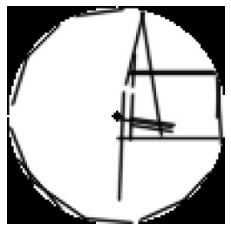

15.jpeg
True label: 3
Predicted label: 2


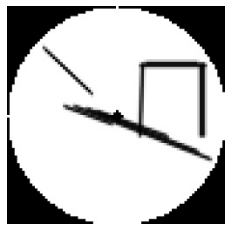

14.jpeg
True label: 9
Predicted label: 4


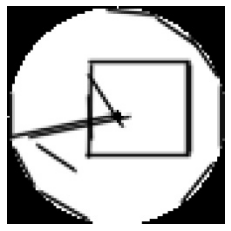

4.jpeg
True label: 10
Predicted label: 6


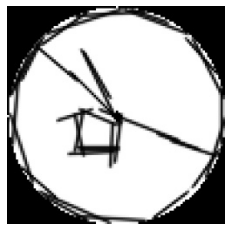

18.jpeg
True label: 6
Predicted label: 4


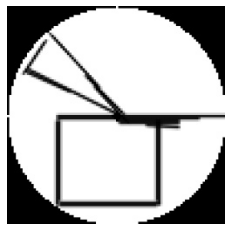

8.jpeg
True label: 3
Predicted label: 1


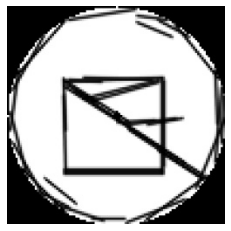

22.jpeg
True label: 10
Predicted label: 4


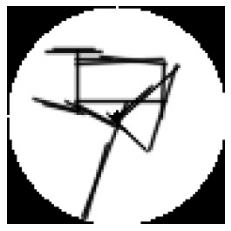

7.jpeg
True label: 9
Predicted label: 2


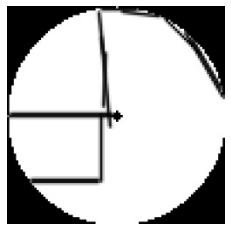

21.jpeg
True label: 11
Predicted label: 6


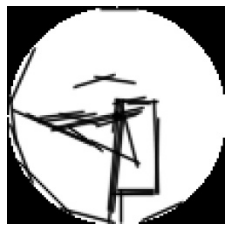

17.jpeg
True label: 8
Predicted label: 11
Accuracy:  0.125


In [65]:
jpeg_files = [f for f in os.listdir('CAPTCHAs_data/processed_test/') if f.endswith('.jpeg')]

count = 0
guessed = 0
for file in jpeg_files:
  image = cv2.imread('CAPTCHAs_data/processed_test/' + file)
  true_index = np.argmax(y[0])
  plt.imshow(image)
  plt.axis('off')
  plt.show()

  # Expand the validation image to (1, 224, 224, 3) before predicting the label
  prediction_scores = model.predict(np.expand_dims(image, axis=0))
  predicted_index = np.argmax(prediction_scores)
  print(file)
  print("True label: " + str(true_hour[file]))
  print("Predicted label: " + class_names[predicted_index])
  if str(true_hour[file]) == class_names[predicted_index]:
    guessed +=1 
  count+=1
print('Accuracy: ', guessed/count)



In [66]:
true_hour

{'1.jpeg': 7,
 '10.jpeg': 4,
 '11.jpeg': 2,
 '12.jpeg': 8,
 '13.jpeg': 2,
 '14.jpeg': 9,
 '15.jpeg': 3,
 '16.jpeg': 9,
 '17.jpeg': 8,
 '18.jpeg': 6,
 '19.jpeg': 4,
 '2.jpeg': 2,
 '20.jpeg': 2,
 '21.jpeg': 11,
 '22.jpeg': 10,
 '23.jpeg': 4,
 '24.jpeg': 5,
 '25.jpeg': 1,
 '26.jpeg': 0,
 '27.jpeg': 4,
 '28.jpeg': 6,
 '29.jpeg': 6,
 '3.jpeg': 4,
 '30.jpeg': 1,
 '31.jpeg': 3,
 '4.jpeg': 10,
 '5.jpeg': 10,
 '6.jpeg': 5,
 '7.jpeg': 9,
 '8.jpeg': 3,
 '9.jpeg': 11,
 'test.jpeg': 8}